### Hierarchical clustering

In [1]:
#importng the libraries
import pandas as pd
import numpy as np

In [2]:
#reading the data
data=pd.read_csv("crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
#dropping the columns
data1=data.drop(columns="Unnamed: 0",axis=1)
data1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [4]:
#describing the data
data1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
# to know the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
#checking for duplicated values
data.duplicated().sum()

0

In [7]:
#checkng for from sklearn.preprocessing import scale,StandardScalernull values
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [8]:
from sklearn.preprocessing import scale,StandardScaler

In [9]:
#standardising the data
scaler=StandardScaler()
data2=pd.DataFrame(scaler.fit_transform(data1))
data2.head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [10]:
#building cluster
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram

In [11]:
z = linkage(data2, method="complete",metric="euclidean")

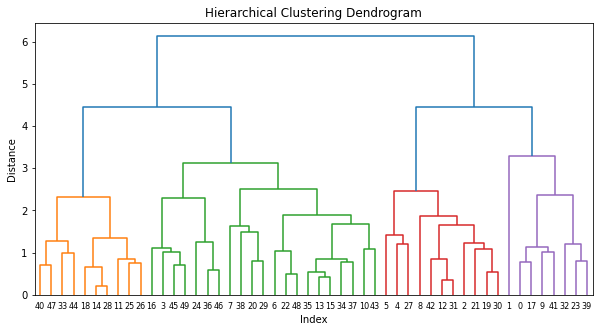

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [14]:
# Now applying AgglomerativeClustering choosing 3 as clusters from the dendrogram
from sklearn.cluster import AgglomerativeClustering 
model=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity = "euclidean").fit(data2)

In [15]:
model.labels_

array([1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
cluster_labels=pd.Series(model.labels_)

In [17]:
data['cluster']=cluster_labels # creating a  new column and assigning it to new column 
data = data.iloc[:,[5,0,1,2,3,4]]
data.head()

,cluster,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,1,Alabama,13.2,236,58,21.2
1,1,Alaska,10.0,263,48,44.5
2,2,Arizona,8.1,294,80,31.0
3,0,Arkansas,8.8,190,50,19.5
4,2,California,9.0,276,91,40.6


In [18]:
#aggregation of each cluster
data.groupby(data.cluster).mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,5.003226,116.483871,63.838710,16.338710
1,14.087500,252.750000,53.500000,24.537500
2,11.054545,264.090909,79.090909,32.618182


### In the above,i took no.of clusters=3,linkage='complete',based on dendogram.so,it has formed 3 clusters and gave output for that

### KMeans clustering

In [19]:
# import all required libraries
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [20]:
#reading the data
data=pd.read_csv("crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [21]:
from sklearn.preprocessing import scale,StandardScaler

In [22]:
#standardising the data
scaler=StandardScaler()
data2=pd.DataFrame(scaler.fit_transform(data1))
data2.head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [23]:
# elbow curve 
k = list(range(2,15))
k

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [24]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data2)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(data2.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,data2.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x17cba4e0af0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

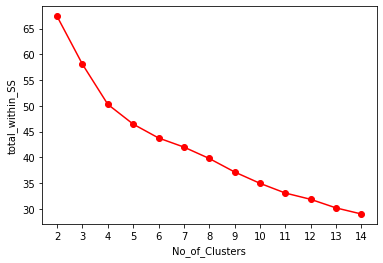

In [25]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [26]:
model=KMeans(n_clusters=5) 
model.fit(data2)

KMeans(n_clusters=5)

In [27]:
#getting the labels for each cluster
model.labels_

array([3, 1, 1, 0, 1, 1, 4, 0, 1, 3, 4, 2, 1, 0, 2, 0, 0, 3, 2, 1, 4, 1,
       2, 3, 0, 0, 0, 1, 2, 4, 1, 1, 3, 2, 0, 0, 0, 4, 4, 3, 2, 3, 1, 4,
       2, 0, 0, 2, 2, 0])

In [28]:
# converting numpy array into pandas series object
md=pd.Series(model.labels_) 

In [29]:
data['cluster']=md
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,4
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [30]:
data = data.iloc[:,[5,0,1,2,3,4]]

In [31]:

data.iloc[:,1:7].groupby(data.cluster).mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,6.785714,146.142857,64.000000,20.350000
1,10.966667,264.000000,76.500000,33.608333
2,2.680000,70.100000,51.000000,10.910000
3,14.671429,251.285714,54.285714,21.685714
4,4.757143,123.428571,81.857143,16.071429


### As observed from the above K-means plotting;with 5 clusters; there is no outliers or overlap has happened.Hence the 5 clusters is good for this model.¶

### DBSCAN clustering

In [32]:
# import all required libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [33]:
#reading the data
data=pd.read_csv("crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [34]:
from sklearn.preprocessing import scale,StandardScaler

In [35]:
#standardising the data
scaler=StandardScaler()
data2=pd.DataFrame(scaler.fit_transform(data1))
data2.head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [36]:
array=data.values
array

array([['Alabama', 13.2, 236, 58, 21.2],
       ['Alaska', 10.0, 263, 48, 44.5],
       ['Arizona', 8.1, 294, 80, 31.0],
       ['Arkansas', 8.8, 190, 50, 19.5],
       ['California', 9.0, 276, 91, 40.6],
       ['Colorado', 7.9, 204, 78, 38.7],
       ['Connecticut', 3.3, 110, 77, 11.1],
       ['Delaware', 5.9, 238, 72, 15.8],
       ['Florida', 15.4, 335, 80, 31.9],
       ['Georgia', 17.4, 211, 60, 25.8],
       ['Hawaii', 5.3, 46, 83, 20.2],
       ['Idaho', 2.6, 120, 54, 14.2],
       ['Illinois', 10.4, 249, 83, 24.0],
       ['Indiana', 7.2, 113, 65, 21.0],
       ['Iowa', 2.2, 56, 57, 11.3],
       ['Kansas', 6.0, 115, 66, 18.0],
       ['Kentucky', 9.7, 109, 52, 16.3],
       ['Louisiana', 15.4, 249, 66, 22.2],
       ['Maine', 2.1, 83, 51, 7.8],
       ['Maryland', 11.3, 300, 67, 27.8],
       ['Massachusetts', 4.4, 149, 85, 16.3],
       ['Michigan', 12.1, 255, 74, 35.1],
       ['Minnesota', 2.7, 72, 66, 14.9],
       ['Mississippi', 16.1, 259, 44, 17.1],
       ['Missouri'

In [37]:
#building a cluster
dbscan = DBSCAN(eps=0.9, min_samples=6)
dbscan.fit(data2)

DBSCAN(eps=0.9, min_samples=6)

In [38]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0],
      dtype=int64)

In [39]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [40]:
pd.concat([data,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


### As observed from the above DBSCAN ; It's epsilon is 0.9 and minpoints is 6 for that there are outliers are obtained for this model.
Compared to all 3 Clustering K-means Clustering is good for this model. Because there is less or no outliers obtained for this dataset.¶